# Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [39]:
df = pd.read_csv(r"E:\archive(3)\datasettt.csv")
df

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,spotify:track:3kcKlOkQQEPVwxwljbGJ5p,Kernkraft 400 (A Better Day),"spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...","Topic, A7S",spotify:album:2NIChqkijGw4r4Dqfmg0A3,Kernkraft 400 (A Better Day),"spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...","Topic, A7S",2022-06-17,https://i.scdn.co/image/ab67616d0000b273e1cafe...,...,0.0562,0.184000,0.000020,0.3090,0.400,125.975,4.0,NaN,Virgin,"C © 2022 Topic, under exclusive license to Uni..."
9995,spotify:track:5k9QrzJFDAp5cXVdzAi02f,Never Say Never - Radio Edit,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,Vandalism,spotify:album:2n506u3HKN3CaEDvAjv5Ct,Never Say Never,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,Vandalism,2005-10-24,https://i.scdn.co/image/ab67616d0000b273b65ad4...,...,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,NaN,Vicious,"C 2005 Vicious, a division of Vicious Recordin..."
9996,spotify:track:5ydeCNaWDmFbu4zl0roPAH,Groovejet (If This Ain't Love) [feat. Sophie E...,"spotify:artist:4bmymFwDu9zLCiTRUmrewb, spotify...","Spiller, Sophie Ellis-Bextor",spotify:album:20Q3pGpYiyicF32x5L8ppH,Groovejet (If This Ain't Love) [feat. Sophie E...,spotify:artist:4bmymFwDu9zLCiTRUmrewb,Spiller,2000-08-14,https://i.scdn.co/image/ab67616d0000b27342781a...,...,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,NaN,Defected Records,"C © 2021 Defected Records Limited, P ℗ 2021 De..."
9997,spotify:track:0zKbDrEXKpnExhGQRe9dxt,Lay Low,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,Tiësto,spotify:album:0EYKSXXTsON8ZA95BuCoXn,Lay Low,spotify:artist:2o5jDhtH

# Exploratory Data Analysis

In [3]:
df.shape

(9999, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

In [5]:
# Basic statistics of numeric columns
numeric_stats = df.describe()
numeric_stats

,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres
count,9999.000000,9999.000000,9.999000e+03,9999.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,0.0
mean,1.035104,4.957096,2.248150e+05,37.624662,0.607925,0.683281,5.167750,-7.269217,0.698410,0.065138,0.208589,0.029331,0.185777,0.585459,121.496650,3.960488,NaN
std,0.327856,5.502810,5.410012e+04,29.460808,0.145869,0.191131,3.578392,3.281731,0.458971,0.061324,0.248842,0.123576,0.149194,0.239105,26.260686,0.250927,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.925795e+05,0.000000,0.515000,0.560000,2.000000,-9.070000,0.000000,0.033100,0.018400,0.000000,0.089200,0.398000,102.642000,4.000000,NaN
50%,1.000000,3.000000,2.199060e+05,42.000000,0.617000,0.712000,5.000000,-6.518000,1.000000,0.042900,0.095600,0.000006,0.128000,0.598000,120.653000,4.000000,NaN
75%,1.000000,7.000000,2.502600e+05,64.000000,0.710000,0.835000,8.000000,-4.887000,1.000000,0.067500,0.318000,0.000561,0.245000,0.783000,134.328000,4.000000,NaN
max,15.000000,93.000000,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000,NaN


In [6]:
# Columns with missing values and their counts
missing_values = df.isnull().sum()
print(missing_values)


Track URI                  0
Track Name                 1
Artist URI(s)              2
Artist Name(s)             1
Album URI                  2
Album Name                 1
Album Artist URI(s)        2
Album Artist Name(s)       2
Album Release Date         2
Album Image URL            4
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL       2897
Explicit                   0
Popularity                 0
ISRC                       3
Added By                   0
Added At                   0
Artist Genres            550
Danceability               2
Energy                     2
Key                        2
Loudness                   2
Mode                       2
Speechiness                2
Acousticness               2
Instrumentalness           2
Liveness                   2
Valence                    2
Tempo                      2
Time Signature             2
Album Genres            9999
Label                      6
Copyrights    

In [7]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 48


,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
248,spotify:track:4DhbiXEuV7JxSR0wuqetTa,Free Ride,spotify:artist:7j9PMegEgVN1fNp8NZXNCI,The Edgar Winter Group,spotify:album:4CNEJF5wYGqhOYEKq8ciu8,They Only Come Out At Night,spotify:artist:3UNrI3SG1l2ezKikxQ2zuk,Edgar Winter,1972-11-30,https://i.scdn.co/image/ab67616d0000b27309a018...,...,0.0597,0.290000,0.003220,0.1890,0.814,124.204,4.0,NaN,Epic,P (P) 1972 SONY BMG MUSIC ENTERTAINMENT
1096,spotify:track:4vp2J1l5RD4gMZwGFLfRAu,I Gotta Feeling,spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,spotify:album:36fdxiOzdlmsrHgGcfvqUJ,THE E.N.D. (THE ENERGY NEVER DIES),spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,2009-01-01,https://i.scdn.co/image/ab67616d0000b273f051a3...,...,0.0265,0.087300,0.000000,0.5090,0.610,127.960,4.0,NaN,Interscope,"C © 2009 Interscope, P ℗ 2009 Interscope"
1493,spotify:track:2dCmGcEOQrMQhMMS8Vj7Ca,Super Freak,spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,spotify:album:2DBFUBBqJQvfXpodPi2WP5,Street Songs (Deluxe Edition),spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,1981-04-07,https://i.scdn.co/image/ab67616d0000b27317f9e7...,...,0.0531,0.220000,0.000000,0.0575,0.962,132.446,4.0,NaN,Motown,"C © 1981 Motown Records, a Division of UMG Rec..."
1582,spotify:track:7Dm3dV3WPNdTgxoNY7YFnc,The Chain - 2004 Remaster,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,spotify:album:1bt6q2SruMsBtcerNVtpZB,Rumours,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,1977-02-04,https://i.scdn.co/image/ab67616d0000b27357df7c...,...,0.0524,0.051700,0.000066,0.0781,0.637,151.796,4.0,NaN,Rhino/Warner Records,"C © 2004 Warner Records Inc., P ℗ 2004 Warner ..."
2123,spotify:track:5eYwDBLucWfWI5KsV7oYX2,Mary Jane's Last Dance,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,spotify:album:7ait6chB3O3C1fMGUDJhtu,Anthology: Through The Years,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,2000-01-01,https://i.scdn.co/image/ab67616d0000b2736cfd76...,...,0.1400,0.038300,0.000001,0.2660,0.516,170.020,4.0,NaN,Interscope,"C © 2000 Universal Music Enterprises, a Divisi..."
2260,spotify:track:1LeWIs2hP2r5yOQnVuYoI5,Ain't No Mountain High Enough,"spotify:artist:3koiLjNrgRTNbOwViDipeA, spotify...","Marvin Gaye, Tammi Terrell",spotify:album:67Eq3nfl1km9s5ig76Cc8B,United,"spotify:artist:3koiLjNrgRTNbOwViDipeA, spotify...","Marvin Gaye, Tammi Terrell",1967-08-29,https://i.scdn.co/image/ab67616d0000b27396e0b7...,...,0.0320,0.430000,0.000000,0.1840,0.800,129.991,4.0,NaN,Motown (Capitol),"C © 1967 Motown Records, a Division of UMG Rec..."
2524,spotify:track:0PGwM5vdr5fMejx0IIAYXj,I Want You Back,spotify:artist:2iE18Oxc8YSumAU232n4rW,The Jackson 5,spotify:album:2oJRp9GV4zpFzpnneGZqZH,20th Century Masters: The Millennium Collectio...,spotify:artist:2iE18Oxc8YSumAU232n4rW,The Jackson 5,1999-01-01,https://i.scdn.co/image/ab67616d0000b273ea76a3...,...,0.0318,0.466000,0.001950,0.1870,0.960,98.293,4.0,NaN,Motown,"C © 1999 Motown Record Company L.P., P This Co..."
2623,spotify:track:39C5FuZ8C8M0QI8CrMsPkR,Foreplay / Long Time,spotify:artist:29kkCKKGXheHuoO829FxWK,Boston,spotify:album:2QLp07RO6anZHmtcKTEvSC,Boston,spotify:artist:29kkCKKGXheHuoO829FxWK,Boston,1976,https://i.scdn.co/image/ab67616d0000b27390ef97...,...,0.0545,0.009830,0.007480,0.0923,0.209,118.704,4.0,NaN,Epic/Legacy,"P (P) 1976, 2006 Epic Records, a division of S..."
2626,spotify:track:4aKIs5t9TqP59btlCGPrgw,Maneater,spotify:artist:77tT1kLj6mCWtFNqiOmP9H,Daryl Hall & John Oates,spotify:album:5nDQAU3K52JimAaShsZoSn,H2O,spotify:artist:77tT1kLj6mCWtFNqiOmP9H,Daryl Hall & John Oates,1982,https://i.scdn.co/image/ab67616d0000b273cb6fdb...,...,0.0398,0.035100,0.000044,0.0973,0.812,88.750,4.0,NaN,RCA/BMG Heritage,P This compilation (P) 2004 BMG Music
2691,spotify:track:6ztstiyZ

In [8]:
# Remove duplicates and update the DataFrame
df.drop_duplicates(keep='first', inplace=True)


In [9]:
# To calculate the mean popularity of songs with the same track name and artist name
aggregated_df = df.groupby(['Track Name', 'Artist Name(s)'])['Popularity'].mean().reset_index()
aggregated_df

,Track Name,Artist Name(s),Popularity
0,! (The Song Formerly Known As),Regurgitator,48.0
1,"""The Take Over, The Breaks Over""",Fall Out Boy,0.0
2,#Beautiful,"Mariah Carey, Miguel",23.5
3,#SELFIE,The Chainsmokers,0.0
4,#WHERESTHELOVE - Charity Single,"Black Eyed Peas, The World",0.0
...,...,...,...
8893,willow - dancing witch version (Elvira remix),"Taylor Swift, ELVIRA",64.0
8894,wish you were gay,Billie Eilish,0.0
8895,working,"Tate McRae, Khalid",65.0
8896,you broke me first,Tate McRae,85.0


In [10]:
# Get the number of unique values in each column
unique_values_count = df.nunique()

unique_values_count

Track URI               9951
Track Name              8258
Artist URI(s)           4134
Artist Name(s)          4129
Album URI               7462
Album Name              6636
Album Artist URI(s)     3298
Album Artist Name(s)    3294
Album Release Date      3332
Album Image URL         7460
Disc Number               10
Track Number              57
Track Duration (ms)     7320
Track Preview URL       6889
Explicit                   2
Popularity                99
ISRC                    8948
Added By                   1
Added At                 609
Artist Genres           2815
Danceability             779
Energy                   876
Key                       12
Loudness                6329
Mode                       2
Speechiness             1059
Acousticness            2746
Instrumentalness        3028
Liveness                1361
Valence                  994
Tempo                   8621
Time Signature             5
Album Genres               0
Label                   1465
Copyrights    

# Visualization

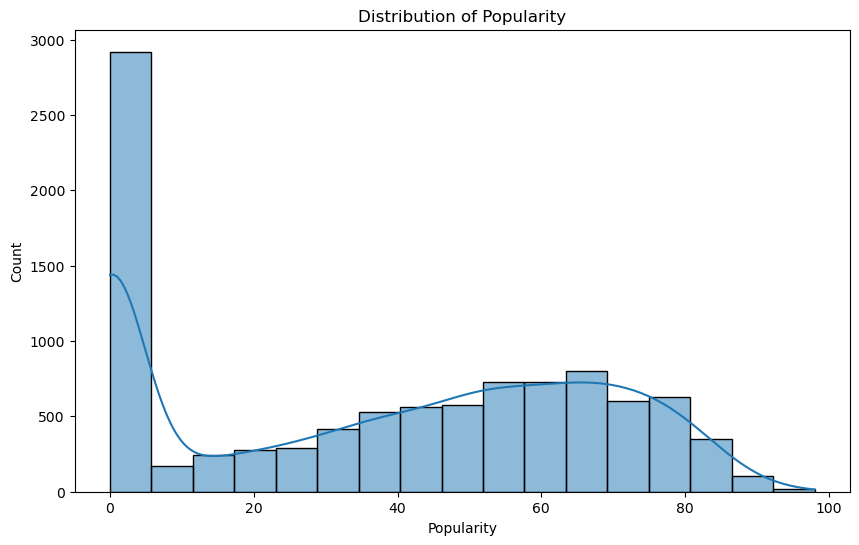

In [11]:


# Distribution of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27668\3346060196.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_boxplot['Release Year'].fillna('Unknown', inplace=True)


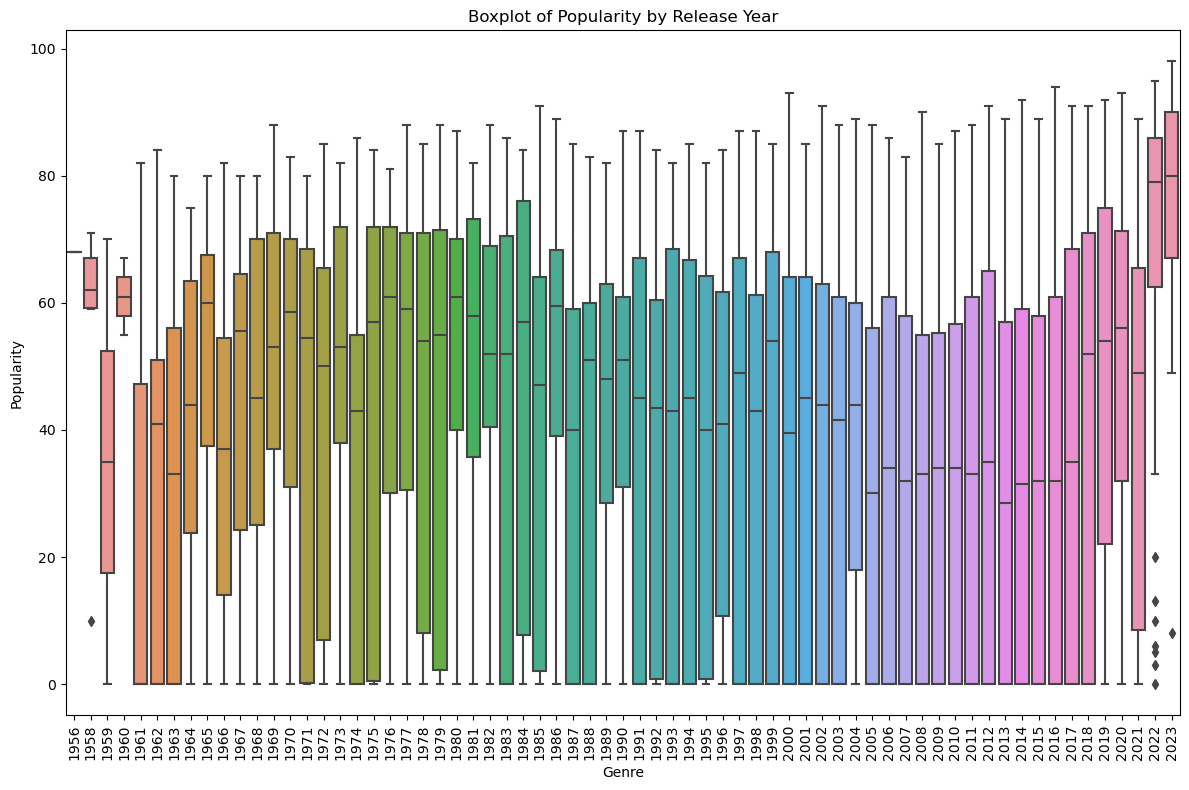

In [12]:
# # Convert the 'Album Release Date' column to datetime
# Filter out rows with invalid dates in 'Album Release Date'
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce')

# Drop rows with invalid dates (NaT) from the DataFrame
df.dropna(subset=['Album Release Date'], inplace=True)

# Extract the year from the release date
df['Release Year'] = df['Album Release Date'].dt.year

# Selecting relevant columns for the plot: Release Year and Popularity
data_for_boxplot = df[['Release Year', 'Popularity']]

# Handle missing values in the 'Artist Genres' column
data_for_boxplot['Release Year'].fillna('Unknown', inplace=True)

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_for_boxplot, x='Release Year', y='Popularity')
plt.xticks(rotation=90)
plt.title('Boxplot of Popularity by Release Year')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

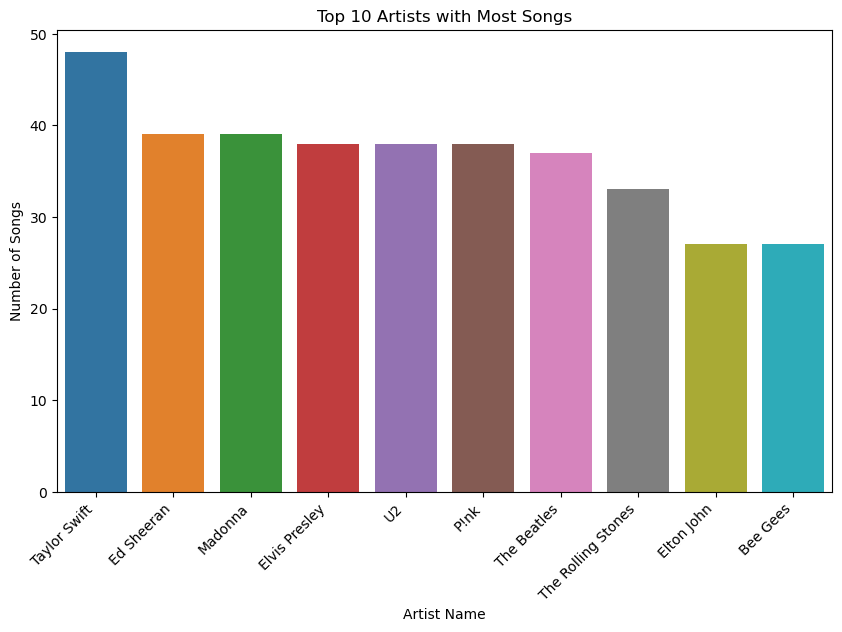

In [14]:
# Top 10 artists with the most number of songs
top_artists = df['Artist Name(s)'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
# Count of unique genres in the 'Artist Genres' column
artist_genres_count = df['Artist Genres'].nunique()
print(f"Number of unique artist genres: {artist_genres_count}")




Number of unique artist genres: 2613


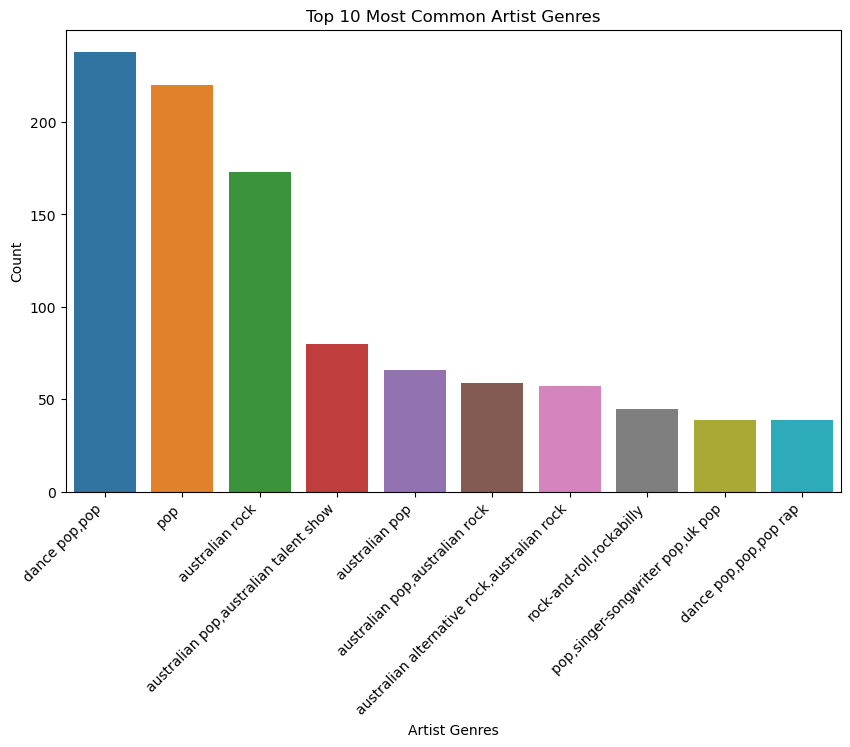

In [16]:
# Top 10 most common artist genres
top_artist_genres = df['Artist Genres'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artist_genres.index, y=top_artist_genres.values)
plt.title('Top 10 Most Common Artist Genres')
plt.xlabel('Artist Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

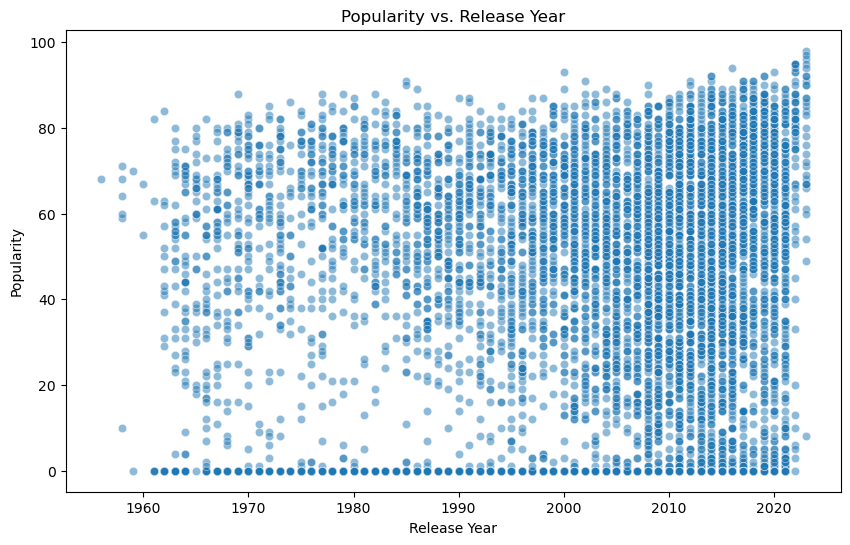

In [17]:
# Popularity vs. Release Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Release Year', y='Popularity', alpha=0.5)
plt.title('Popularity vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()

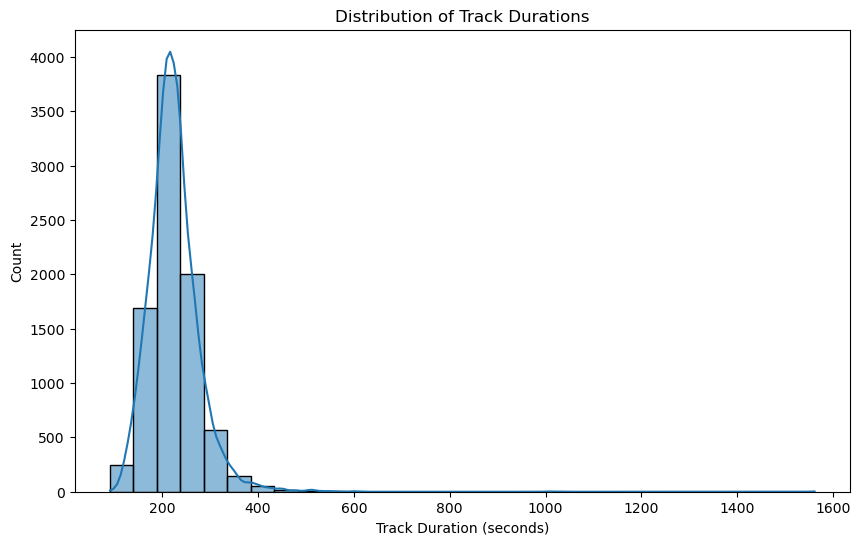

In [18]:
# Distribution of Track Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Track Duration (ms)'] / 1000, bins=30, kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Track Duration (seconds)')
plt.ylabel('Count')
plt.show()


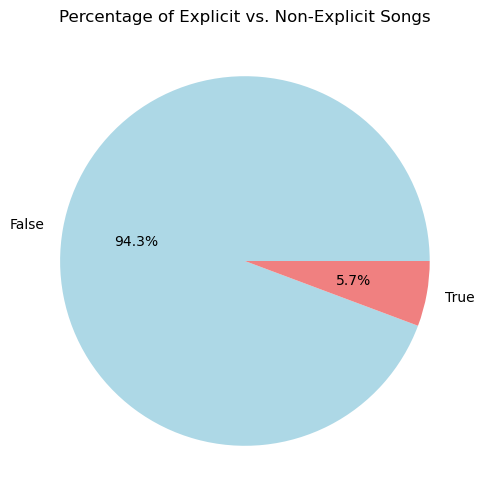

In [19]:
# Explicit vs. Non-Explicit Songs
plt.figure(figsize=(6, 6))
df['Explicit'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Percentage of Explicit vs. Non-Explicit Songs')
plt.ylabel('')
plt.show()


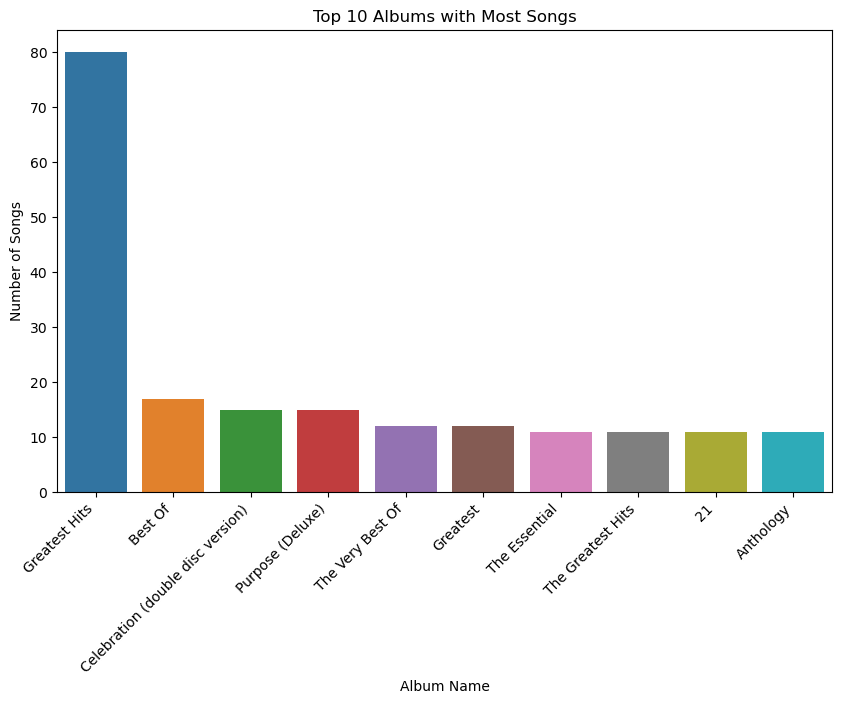

In [20]:
# Top 10 Albums with Most Songs
top_albums = df['Album Name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_albums.index, y=top_albums.values)
plt.title('Top 10 Albums with Most Songs')
plt.xlabel('Album Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()


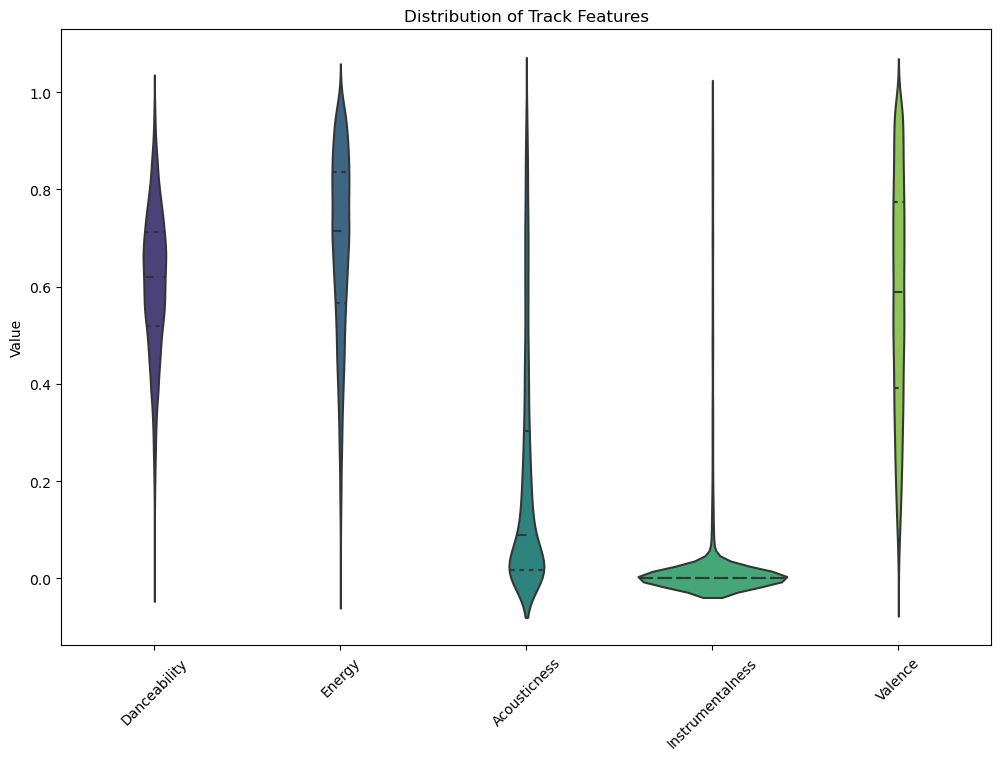

In [21]:
# Selecting relevant features for visualization
selected_features = df[['Danceability', 'Energy', 'Acousticness', 'Instrumentalness', 'Valence']]

# Violin plots for selected track features
plt.figure(figsize=(12, 8))
sns.violinplot(data=selected_features, palette='viridis', inner='quartile')
plt.title('Distribution of Track Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


# Unsupervised Models

## K-means clustering of songs

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

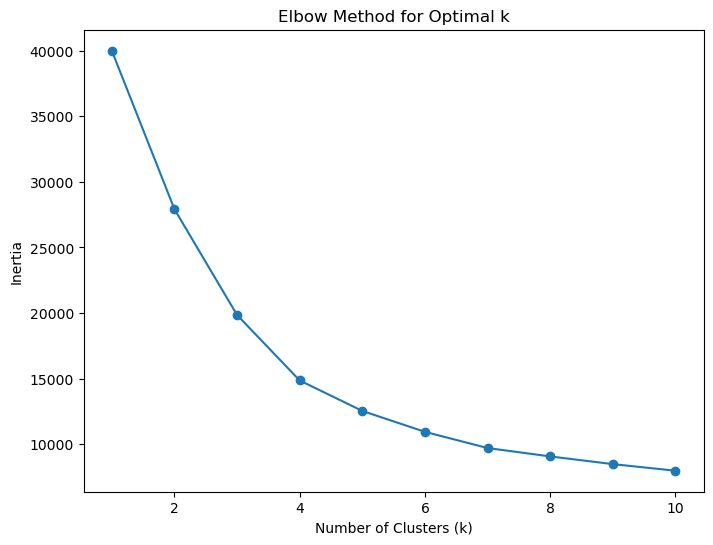

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
4    3571
0    3069
3    1733
1    1310
2     316
Name: count, dtype: int64


In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Selecting relevant features for clustering
features_for_clustering = df[['Energy', 'Valence', 'Acousticness', 'Instrumentalness']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(scaled_features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(imputed_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
# Let's say k=5
k = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(imputed_features)

# Add the 'Cluster' column to the DataFrame
df['Cluster'] = clusters

# Print the number of songs in each cluster
print(df['Cluster'].value_counts())

In [ ]:
     Danceability          9997 non-null   float64
 21  Energy                9997 non-null   float64
 22  Key                   9997 non-null   float64
 23  Loudness              9997 non-null   float64
 24  Mode                  9997 non-null   float64
 25  Speechiness           9997 non-null   float64
 26  Acousticness          9997 non-null   float64
 27  Instrumentalness      9997 non-null   float64
 28  Liveness              9997 non-null   float64
 29  Valence               9997 non-null   float64
 30  Tempo                 9997 non-null   float64
 31  Time Signature        9997 non-null   float64
 32  Album Genres          0 non-null      float64

4 clusters based on elbow method it looks like.

## Recommendation System

In [67]:
# Function to recommend similar songs based on track features
def recommend_similar_songs(mode, top_n=5):
    song_features = df[df['Danceability'] == mode][['Energy', 'Valence', 'Acousticness', 'Instrumentalness']]
    if len(song_features) == 0:
        print("Song not found in the dataset.")
        return

    # Calculate the Euclidean distance between the selected song and all other songs
    distances = np.sqrt(np.sum((features_for_clustering - song_features.values[0])**2, axis=1))

    # Get the indices of the most similar songs
    similar_song_indices = np.argsort(distances)[1:top_n + 1]

    # Display the recommended similar songs
    print(f"Recommended Songs Similar to '{mode}':")
    a=[]
    for idx in similar_song_indices:
        
        recommended_song = df.iloc[idx]['Track Name']
        print(f"- {recommended_song}")
        a.append(recommended_song)
    print(a)




In [73]:
# Usage example:
# Let's recommend 5 songs similar to the track "Justified & Ancient - Stand by the Jams"
recommend_similar_songs(0.51, top_n=10)

Recommended Songs Similar to '0.51':
- You've Got To Hide Your Love Away
- Down Among The Dead Men
- Young Turks - 2008 Remaster
- Smooth Criminal - 2012 Remaster
- B.O.T.A. (Baddest Of Them All) - Edit
- William Tell
- Abergavenny
- Touch Me (Radio Edit)
- Axel F
- Wipe Out
["You've Got To Hide Your Love Away", 'Down Among The Dead Men', 'Young Turks - 2008 Remaster', 'Smooth Criminal - 2012 Remaster', 'B.O.T.A. (Baddest Of Them All) - Edit', 'William Tell', 'Abergavenny', 'Touch Me (Radio Edit)', 'Axel F', 'Wipe Out']


# Supervised Models

## Predicting Song Popularity using Regression

### Linear Regression

In [25]:
# Selecting relevant features for prediction
features_for_prediction = df[['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']]

# Target variable: Popularity
target = df['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_prediction, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r_squared}")

# Optional: Print the coefficients of the model
print("Model Coefficients:")
for feature, coefficient in zip(features_for_prediction.columns, model.coef_):
    print(f"{feature}: {coefficient}")


Mean Squared Error (MSE): 872.06429073485
R-squared (R2): 0.0008905006208617117
Model Coefficients:
Danceability: 16.754805176586792
Energy: 0.5290389066356586
Valence: -6.062853441110534
Acousticness: -4.902046093796449
Instrumentalness: -8.947630246696782


### Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2): {r_squared_rf}")


Random Forest - Mean Squared Error (MSE): 937.159421685308
Random Forest - R-squared (R2): -0.073687904190471


### Gradient Boosting Regressor

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_gb = gb_model.predict(X_test)

# Model evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r_squared_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting - R-squared (R2): {r_squared_gb}")


Gradient Boosting - Mean Squared Error (MSE): 881.1592259857075
Gradient Boosting - R-squared (R2): -0.009529414862333718


### Support Vector Regression 

In [28]:
from sklearn.svm import SVR

# Create and train the Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_svr = svr_model.predict(X_test)

# Model evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r_squared_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - Mean Squared Error (MSE): {mse_svr}")
print(f"SVR - R-squared (R2): {r_squared_svr}")


SVR - Mean Squared Error (MSE): 901.5361052215347
SVR - R-squared (R2): -0.03287486522478478


## Genre Classification

In [29]:
# Selecting relevant features for genre classification
features_for_genre = df[['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']]

# Target variable: Genre
target_genre = df['Artist Genres']

# Handle missing values in the 'Artist Genres' column
target_genre.fillna('Unknown', inplace=True)

# Encode the genre labels (convert genre names to numeric labels)
label_encoder = LabelEncoder()
target_genre_encoded = label_encoder.fit_transform(target_genre)

# Split the data into training and testing sets
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(
    features_for_genre, target_genre_encoded, test_size=0.2, random_state=42
)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_genre, y_train_genre)

# Predict genre labels on the test set
y_pred_genre = rf_classifier.predict(X_test_genre)

# Decode the numeric genre labels back to genre names
y_pred_genre_decoded = label_encoder.inverse_transform(y_pred_genre)
y_test_genre_decoded = label_encoder.inverse_transform(y_test_genre)

# Model evaluation
accuracy = accuracy_score(y_test_genre_decoded, y_pred_genre_decoded)
classification_report_str = classification_report(y_test_genre_decoded, y_pred_genre_decoded)
conf_matrix = confusion_matrix(y_test_genre_decoded, y_pred_genre_decoded)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\

In [30]:
print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.15433896330809552
Confusion Matrix:
[[20  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
